In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('Danhsach_k27.csv',index_col=None)
df.head()

,Thứ tự lớp,Mã sinh viên,Họ,Tên,Ngày Sinh,Giới Tính,Nơi Sinh,Lớp sinh hoạt
0,1.0,27202201262,Dương Quốc Hoài,Ân,20-08-2003,Nữ,Gia Lai,K27QTM6
1,2.0,27212228975,Nguyễn Vũ Thiên,Bảo,20-02-2003,Nam,Quảng Nam,K27QTM6
2,3.0,27212240159,Nguyễn Thành,Chung,18-03-2003,Nam,Quảng Bình,K27QTM6
3,4.0,27212201242,Đoàn Vinh,Diệu,10-06-2003,Nam,Quảng Nam,K27QTM6
4,5.0,27202235586,Mai Thị,Dung,28-09-2003,Nữ,Gia Lai,K27QTM6


In [19]:
df.columns

Index(['Thứ tự lớp', 'Mã sinh viên', 'Họ', 'Tên', 'Ngày Sinh', 'Giới Tính',
       'Nơi Sinh', 'Lớp sinh hoạt'],
      dtype='object')

In [20]:
missing_values = df.isnull().sum()
missing_values

Thứ tự lớp         0
Mã sinh viên       0
Họ                 0
Tên                0
Ngày Sinh          0
Giới Tính          0
Nơi Sinh         106
Lớp sinh hoạt      0
dtype: int64

In [21]:
missing_indicating = df[df.isnull().any(axis=1)].index
missing_indicating

Index([  17,   20,  137,  143,  168,  183,  315,  369,  388,  465,
       ...
       6508, 6579, 6640, 6666, 6683, 6910, 7007, 7096, 7134, 7136],
      dtype='int64', length=106)

In [22]:
# Giả sử df là dataframe của bạn
columns_to_check = ['Thứ tự lớp', 'Mã sinh viên', 'Họ', 'Tên', 'Ngày Sinh', 'Giới Tính', 'Nơi Sinh', 'Lớp sinh hoạt']

for column in columns_to_check:
    missing_rows = df[df[column].isnull()]
    print(f"Missing values in column '{column}':")
    print(missing_rows.index.tolist())

Missing values in column 'Thứ tự lớp':
[]
Missing values in column 'Mã sinh viên':
[]
Missing values in column 'Họ':
[]
Missing values in column 'Tên':
[]
Missing values in column 'Ngày Sinh':
[]
Missing values in column 'Giới Tính':
[]
Missing values in column 'Nơi Sinh':
[17, 20, 137, 143, 168, 183, 315, 369, 388, 465, 579, 616, 626, 630, 668, 672, 685, 705, 764, 767, 823, 846, 951, 958, 1169, 1205, 1211, 1282, 1332, 1363, 1366, 1369, 1372, 1403, 1412, 1417, 1433, 1437, 1603, 1751, 1836, 1841, 2888, 2949, 3075, 3283, 3307, 3342, 3350, 3425, 3524, 3551, 3602, 3608, 3624, 3632, 3634, 3683, 3693, 3786, 3787, 3949, 3992, 3994, 3996, 4020, 4079, 4080, 4276, 4486, 4572, 4634, 4746, 4837, 4952, 4964, 4995, 5052, 5138, 5208, 5211, 5216, 5289, 5315, 5688, 5773, 5812, 5928, 6013, 6019, 6262, 6267, 6313, 6387, 6474, 6478, 6508, 6579, 6640, 6666, 6683, 6910, 7007, 7096, 7134, 7136]
Missing values in column 'Lớp sinh hoạt':
[]


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213 entries, 0 to 7212
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Thứ tự lớp     7213 non-null   float64
 1   Mã sinh viên   7213 non-null   int64  
 2   Họ             7213 non-null   object 
 3   Tên            7213 non-null   object 
 4   Ngày Sinh      7213 non-null   object 
 5   Giới Tính      7213 non-null   object 
 6   Nơi Sinh       7107 non-null   object 
 7   Lớp sinh hoạt  7213 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 450.9+ KB


In [24]:
df = df.dropna(axis=0, how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7107 entries, 0 to 7212
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Thứ tự lớp     7107 non-null   float64
 1   Mã sinh viên   7107 non-null   int64  
 2   Họ             7107 non-null   object 
 3   Tên            7107 non-null   object 
 4   Ngày Sinh      7107 non-null   object 
 5   Giới Tính      7107 non-null   object 
 6   Nơi Sinh       7107 non-null   object 
 7   Lớp sinh hoạt  7107 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 499.7+ KB


In [25]:
unique_places = df['Nơi Sinh'].unique()
unique_places

array(['Gia Lai', 'Quảng Nam', 'Quảng Bình', 'Đà Nẵng', 'Đắk Lắk',
       'Phú Yên', 'Quảng Ngãi', 'Thừa Thiên Huế', 'Bắc Ninh', 'Nghệ An',
       'Bình Định', 'Thái Bình', 'Quảng Trị', 'Hà Nội', 'Kon Tum',
       'Hà Tĩnh', 'Đắk Nông', 'Bình Thuận', 'Hồ Chí Minh', 'Khánh Hòa',
       'Ninh Thuận', 'Thanh Hóa', 'Ninh Bình', 'Bắc Giang', 'Đồng Nai',
       'Lâm Đồng', 'Phú Thọ', 'Nam Định', 'Hưng Yên', 'Hải Phòng',
       'Vĩnh Long', 'Điện Biên', 'Lạng Sơn', 'Bình Phước', 'Bến Tre',
       'Cao Bằng', 'Hà Nam', 'Sơn La', 'Tiền Giang', 'Cần Thơ',
       'Quảng Ninh', 'Lai Châu', 'Yên Bái', 'Cà Mau', 'Bình Dương',
       'Trà Vinh', 'Hải Dương', 'Kiên Giang', 'Hậu Giang', 'Vĩnh Phúc',
       'Bà Rịa', 'Thái Nguyên', 'Tỉnh Quảng Nam', 'Hòa Bình',
       'Nha Trang, Khánh Hòa', 'Hà Giang', 'Sóc Trăng', 'An Giang',
       'Lào Cai'], dtype=object)

In [26]:
# Chuẩn hóa tên tỉnh thành
df.loc[:, 'Nơi Sinh'] = df['Nơi Sinh'].replace({'Tỉnh Quảng Nam': 'Quảng Nam', 'Nha Trang, Khánh Hòa': 'Khánh Hòa'})
# check lại
unique_places = df['Nơi Sinh'].unique()
unique_places

array(['Gia Lai', 'Quảng Nam', 'Quảng Bình', 'Đà Nẵng', 'Đắk Lắk',
       'Phú Yên', 'Quảng Ngãi', 'Thừa Thiên Huế', 'Bắc Ninh', 'Nghệ An',
       'Bình Định', 'Thái Bình', 'Quảng Trị', 'Hà Nội', 'Kon Tum',
       'Hà Tĩnh', 'Đắk Nông', 'Bình Thuận', 'Hồ Chí Minh', 'Khánh Hòa',
       'Ninh Thuận', 'Thanh Hóa', 'Ninh Bình', 'Bắc Giang', 'Đồng Nai',
       'Lâm Đồng', 'Phú Thọ', 'Nam Định', 'Hưng Yên', 'Hải Phòng',
       'Vĩnh Long', 'Điện Biên', 'Lạng Sơn', 'Bình Phước', 'Bến Tre',
       'Cao Bằng', 'Hà Nam', 'Sơn La', 'Tiền Giang', 'Cần Thơ',
       'Quảng Ninh', 'Lai Châu', 'Yên Bái', 'Cà Mau', 'Bình Dương',
       'Trà Vinh', 'Hải Dương', 'Kiên Giang', 'Hậu Giang', 'Vĩnh Phúc',
       'Bà Rịa', 'Thái Nguyên', 'Hòa Bình', 'Hà Giang', 'Sóc Trăng',
       'An Giang', 'Lào Cai'], dtype=object)

### Chuẩn bị tới công cuộc vẽ biểu đồ 
* Đầu tiên sẽ vẽ phân bố giới tính của sinh viên

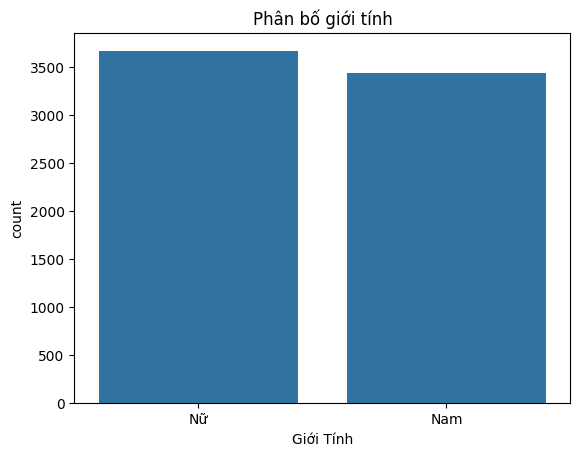

In [27]:
sns.countplot(x='Giới Tính',data=df)
plt.title('Phân bố giới tính')
plt.show()

### Chuyển biểu đồ về dạng pie chart
`Tính tỷ lệ nam so với nữ`

In [28]:
gender_count = df['Giới Tính'].value_counts()
gender_count

Giới Tính
Nữ     3671
Nam    3436
Name: count, dtype: int64

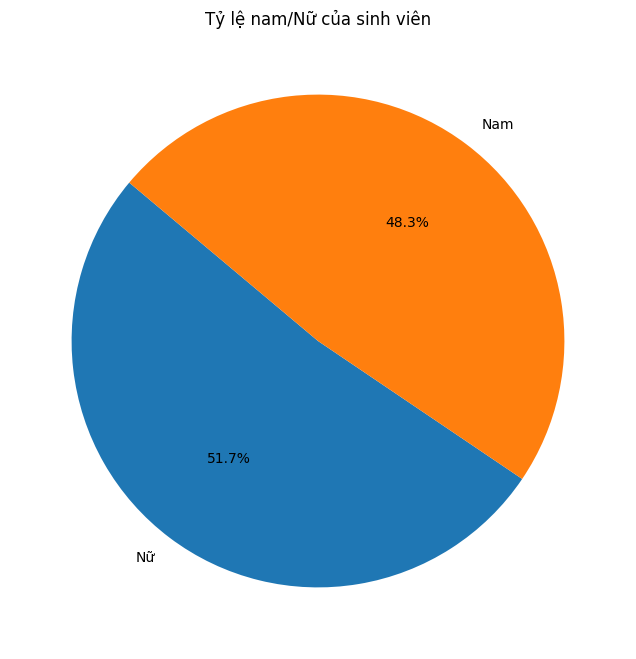

In [29]:
plt.figure(figsize=(8,8))
plt.pie(gender_count,labels=gender_count.index,autopct='%1.1f%%',startangle=140)
plt.title('Tỷ lệ nam/Nữ của sinh viên')
plt.show()

### Vẽ biểu đồ phân bố sinh viên theo nơi sinh 
`Trước ta đã có chuẩn hóa tỉnh thành để có thể vẽ phân bố sinh viên theo nới sinh đúng nhất có thể`

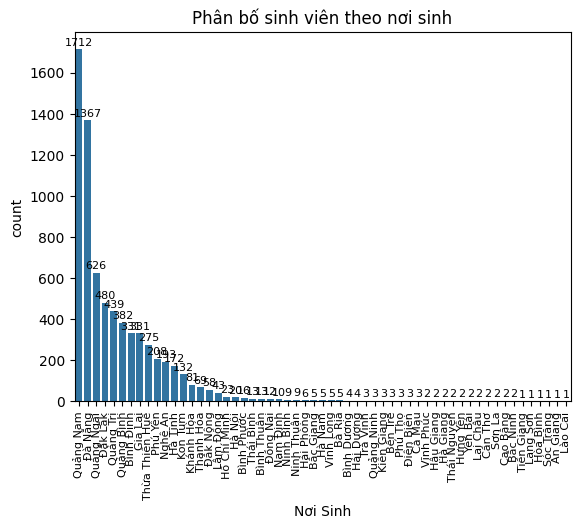

In [31]:
plot = sns.countplot(x = 'Nơi Sinh',data=df,order=df['Nơi Sinh'].value_counts().index)
plt.title('Phân bố sinh viên theo nơi sinh')
# Xoay nơi sinh 90 độ để xem đồ thị được rõ hơn
plt.xticks(rotation=90,fontsize=8)
# Thêm số lượng lên trên từng cột
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 3),
                  textcoords='offset points')
plt.show()